# Capstone Project

## Which neighbourhoods in New York and London are similar?


### Introduction

For this assignment, I am going to compare London and New York neighbourhoods using the foursquare API to explore venues in each neighbourhood and then clustering the neigbourhoods on the presence of the venues in each neighbourhood.

There may be companies, from the US, UK or from other countries, that are considering setting up public premises in either London or New York, or both. A company based and with premises in NY might want to know which neighbourhood in London is most similar in terms of estbalishements, or vice versa. Part of the analysis would be to segment the neighbourhoods and define the segments by the prevalence of different types of establishments.

### Methodology
-Use requests and Beautiful Soup from website data on neighbourhoods in New York and London - using wikipedia pages on towns in Greater London and the New York Neighbourhood data from a previous session from the course.
-Use Geopy, Geopandas or any other Geolocation API Service to find the Latitude and Longitude of the neighbourhoods
-Use the fousquare API and the Postcodes to explore the neighbourhoods and return the venues within a radius of 1km of each neighbourhood centre
-Change the venue category of certain venues in order to esnure a better analysis and clustering. For exmaple, there may be different types of restaurants in each city (lebanese restaurant, italian restaurant, Indian restaurant) and the profil of the cities may differ greatly due to many cultrual and historical factors, but for the purposes of the analysis, all these establishments are restaurants. Not making this change might lead to two neighbourhoods to be labelled in different groups but they may actually have a similar number of restaurants or other types of estbalishment and thus be quite similar. For the purposes of this notebook,
-Clean the data, pass to a dataframe and group the venues by neighbourhood to see the number of venues of each type in a neighbourhood
-Cluster the neigbourhoods in London and New York according to the presence of and quantity of different types of venues.
-Pass the Cluster back into the combined dataframe and then use the cluster, latitude and longitude of each cluster 
-Define the cluster centre for each cluster (in terms of the 10 top most common types of venue in each cluster centre)




## Webscraping to find the neighbourhoods in Greater London

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib.request




In [2]:
url='https://en.wikipedia.org/wiki/List_of_areas_of_London#Sub-districts'
html=urllib.request.urlopen(url).read()
soup=BeautifulSoup(html,'html.parser')

In [4]:
soup.find_all('tbody')[1].find_all('tr')[1]

<tr>
<td><a href="/wiki/Abbey_Wood" title="Abbey Wood">Abbey Wood</a></td>
<td>Bexley,  Greenwich <sup class="reference" id="cite_ref-mills1_7-0"><a href="#cite_note-mills1-7">[7]</a></sup></td>
<td>LONDON</td>
<td>SE2</td>
<td>020</td>
<td><span class="plainlinks nourlexpansion" style="white-space: nowrap"><a class="external text" href="https://geohack.toolforge.org/geohack.php?pagename=List_of_areas_of_London&amp;params=51.48648031512_N_0.10859224316653_E_region:GB" rel="nofollow">TQ465785</a></span>
</td></tr>

In [5]:

#Crete empty lists for dataframe

neighbourhoods=[]
postcodes=[]
town=[]

#import Regex which will use to split the values separated by commas in some of the table cells (to take the first value only)

import re

#loop through soup object and for each 'tr', and take the Neighbourhood, PostCode and Town values and store and pass them to empty lists

for row in soup.find_all('tbody')[1].find_all('tr'):
    try:
        neighbourhoods.append(re.split(',',row.find('a').get_text())[0])
    except:
        neighbourhoods.append('')
    try:
        postcodes.append(re.split(',',row.find_all('td')[3].get_text())[0])
    except:
        postcodes.append('')
    try:
        town.append(re.split(',',row.find_all('td')[2].get_text())[0])
    except:
        town.append('')
df=pd.DataFrame(data={'Neighbourhood':neighbourhoods,'Town':town,'Postcode':postcodes})
df
                
                
                

Neighbourhood            Town Postcode
0                                            
1         Abbey Wood          LONDON      SE2
2              Acton          LONDON       W3
3          Addington         CROYDON      CR0
4         Addiscombe         CROYDON      CR0
..               ...             ...      ...
527         Woolwich          LONDON     SE18
528   Worcester Park  WORCESTER PARK      KT4
529  Wormwood Scrubs          LONDON      W12
530          Yeading           HAYES      UB4
531         Yiewsley    WEST DRAYTON      UB7

[532 rows x 3 columns]

In [6]:
from geopy.geocoders import Nominatim

latlist=[]
lnglist=[]
for x in df['Neighbourhood']:
    try:
        postcode=x
        address='{}, London, United Kingdom'.format(postcode)
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude=location.latitude
        longitude=location.longitude
        latlist.append(latitude)
        lnglist.append(longitude)
    except:
        latlist.append('Could not find')
        lnglist.append('Could not find')

In [7]:
df['Latitude']=latlist
df['Longitude']=lnglist
df

Neighbourhood            Town Postcode        Latitude       Longitude
0                                                     51.5073       -0.127647
1         Abbey Wood          LONDON      SE2         51.4876         0.11405
2              Acton          LONDON       W3         51.5081       -0.273261
3          Addington         CROYDON      CR0         51.3586      -0.0316347
4         Addiscombe         CROYDON      CR0  Could not find  Could not find
..               ...             ...      ...             ...             ...
527         Woolwich          LONDON     SE18         51.4827       0.0623335
528   Worcester Park  WORCESTER PARK      KT4         51.3785        -0.24166
529  Wormwood Scrubs          LONDON      W12         51.5214       -0.240554
530          Yeading           HAYES      UB4         51.5272        -0.39927
531         Yiewsley    WEST DRAYTON      UB7         51.5129       -0.474152

[532 rows x 5 columns]

In [8]:
df=df.drop(index=0)

In [9]:
df.reset_index()
df

Neighbourhood            Town Postcode        Latitude       Longitude
1         Abbey Wood          LONDON      SE2         51.4876         0.11405
2              Acton          LONDON       W3         51.5081       -0.273261
3          Addington         CROYDON      CR0         51.3586      -0.0316347
4         Addiscombe         CROYDON      CR0  Could not find  Could not find
5        Albany Park          BEXLEY      DA5  Could not find  Could not find
..               ...             ...      ...             ...             ...
527         Woolwich          LONDON     SE18         51.4827       0.0623335
528   Worcester Park  WORCESTER PARK      KT4         51.3785        -0.24166
529  Wormwood Scrubs          LONDON      W12         51.5214       -0.240554
530          Yeading           HAYES      UB4         51.5272        -0.39927
531         Yiewsley    WEST DRAYTON      UB7         51.5129       -0.474152

[531 rows x 5 columns]

In [10]:
dflondon=df

## Import New York Data 

In [11]:
#import New York Data from csv from previous assignments

import json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    


In [12]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [13]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [14]:
neighborhoods

Borough  Neighborhood   Latitude  Longitude
0            Bronx     Wakefield  40.894705 -73.847201
1            Bronx    Co-op City  40.874294 -73.829939
2            Bronx   Eastchester  40.887556 -73.827806
3            Bronx     Fieldston  40.895437 -73.905643
4            Bronx     Riverdale  40.890834 -73.912585
..             ...           ...        ...        ...
301      Manhattan  Hudson Yards  40.756658 -74.000111
302         Queens       Hammels  40.587338 -73.805530
303         Queens     Bayswater  40.611322 -73.765968
304         Queens  Queensbridge  40.756091 -73.945631
305  Staten Island     Fox Hills  40.617311 -74.081740

[306 rows x 4 columns]

## Explore Each Neighbourhood

In [15]:
#explore neighbourhood london

import requests

CLIENT_ID = 'OE5VESPC1ZSIX54XICQMANEI53CCFPCA1BWERZAFVRFMTQGO'
CLIENT_SECRET = 'EGULOWLU2F2ZK2YDACU5VTGC00H11C24ZGOF2E3HO3UFBJL2'
ACCESS_TOKEN = 'HRVT4ZEB03RPU34HXUHYJVIWZYDKESDEHPNLUYTZRIUNK4US'
VERSION = '20180604'
LIMIT = 100
radius=1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OE5VESPC1ZSIX54XICQMANEI53CCFPCA1BWERZAFVRFMTQGO
CLIENT_SECRET:EGULOWLU2F2ZK2YDACU5VTGC00H11C24ZGOF2E3HO3UFBJL2


In [17]:
#function for creating dataframe of venues for all neighbourhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            continue
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Explore London Venues

In [18]:

London_venues = getNearbyVenues(names=dflondon['Neighbourhood'],
                                   latitudes=dflondon['Latitude'],
                                   longitudes=dflondon['Longitude']
                                  )

Abbey Wood
Acton
Addington
Addiscombe
Albany Park
Aldborough Hatch
Aldgate
Aldwych
Alperton
Anerley
Angel
Aperfield
Archway
Ardleigh Green
Arkley
Arnos Grove
Balham
Bankside
Barbican
Barking
Barkingside
Barnehurst
Barnes
Barnes Cray
Barnet Gate
Barnet
Barnsbury
Battersea
Bayswater
Beckenham
Beckton
Becontree
Becontree Heath
Beddington
Bedford Park
Belgravia
Bellingham
Belmont
Belmont
Belsize Park
Belvedere
Bermondsey
Berrylands
Bethnal Green
Bexley
Bexleyheath
Bickley
Biggin Hill
Blackfen
Blackfriars
Blackheath
Blackheath Royal Standard
Blackwall
Blendon
Bloomsbury
Botany Bay
Bounds Green
Bow
Bowes Park
Brentford
Brent Cross
Brent Park
Brimsdown
Brixton
Brockley
Bromley
Bromley
Bromley Common
Brompton
Brondesbury
Brunswick Park
Bulls Cross
Burnt Oak
Burroughs
Camberwell
Cambridge Heath
Camden Town
Canary Wharf
Cann Hall
Canning Town
Canonbury
Carshalton
Castelnau
Castle Green
Catford
Chadwell Heath
Chalk Farm
Charing Cross
Charlton
Chase Cross
Cheam
Chelsea
Chelsfield
Chessington
Child

In [19]:
London_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Abbey Wood              51.487621                0.114050   
1       Abbey Wood              51.487621                0.114050   
2       Abbey Wood              51.487621                0.114050   
3            Acton              51.508140               -0.273261   
4            Acton              51.508140               -0.273261   
...            ...                    ...                     ...   
11308     Yiewsley              51.512866               -0.474152   
11309     Yiewsley              51.512866               -0.474152   
11310     Yiewsley              51.512866               -0.474152   
11311     Yiewsley              51.512866               -0.474152   
11312     Yiewsley              51.512866               -0.474152   

                                      Venue  Venue Latitude  Venue Longitude  \
0                                Co-op Food       51.487490         0.113751   
1                            Bostal Gardens       51.486670         0.110462   
2                   Abbey Wood Caravan Club       51.485502         0.120014   
3      Dragonfly Brewery at George & Dragon       51.507378        -0.271702   
4                         London Star Hotel       51.509624        -0.272456   
...                                     ...             ...              ...   
11308                           the sun pub       51.515153        -0.476193   
11309                            Platform 4       51.509896        -0.471968   
11310                            Platform 3       51.509819        -0.471824   
11311                           the owl pub       51.515669        -0.477196   
11312                            Platform 2       51.509788        -0.471881   

      Venue Category  
0      Grocery Store  
1         Playground  
2         Campground  
3            Brewery  
4              Hotel  
...              ...  
11308            Pub  
11309       Platform  
11310       Platform  
11311            Bar  
11312       Platform  

[11313 rows x 7 columns]

### Change Venue Categories

If a venue category contains the string 'Restaurant', change to restaruant. More changes can be made for other categories i.e. changing pub to bar, grocery store to supermarket, etc. to standardise the venue categories

In [20]:


London_venues2=London_venues
vc=[]
for index, row in London_venues2.iterrows():
    
    if 'Restaurant' in row[6]:
        row[6]='Restaurant'
    else:
        row[6]=row[6]
    vc.append(row[6])

In [21]:
London_venues2['Venue Category']=vc
London_venues2

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Abbey Wood              51.487621                0.114050   
1       Abbey Wood              51.487621                0.114050   
2       Abbey Wood              51.487621                0.114050   
3            Acton              51.508140               -0.273261   
4            Acton              51.508140               -0.273261   
...            ...                    ...                     ...   
11308     Yiewsley              51.512866               -0.474152   
11309     Yiewsley              51.512866               -0.474152   
11310     Yiewsley              51.512866               -0.474152   
11311     Yiewsley              51.512866               -0.474152   
11312     Yiewsley              51.512866               -0.474152   

                                      Venue  Venue Latitude  Venue Longitude  \
0                                Co-op Food       51.487490         0.113751   
1                            Bostal Gardens       51.486670         0.110462   
2                   Abbey Wood Caravan Club       51.485502         0.120014   
3      Dragonfly Brewery at George & Dragon       51.507378        -0.271702   
4                         London Star Hotel       51.509624        -0.272456   
...                                     ...             ...              ...   
11308                           the sun pub       51.515153        -0.476193   
11309                            Platform 4       51.509896        -0.471968   
11310                            Platform 3       51.509819        -0.471824   
11311                           the owl pub       51.515669        -0.477196   
11312                            Platform 2       51.509788        -0.471881   

      Venue Category  
0      Grocery Store  
1         Playground  
2         Campground  
3            Brewery  
4              Hotel  
...              ...  
11308            Pub  
11309       Platform  
11310       Platform  
11311            Bar  
11312       Platform  

[11313 rows x 7 columns]

In [22]:


# one hot encoding
london_onehot = pd.get_dummies(London_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = London_venues2['Neighborhood'] 

# move neighborhood column to the first column
cols = ['Neighborhood']  + [col for col in london_onehot if col != 'Neighborhood']
london_onehot = london_onehot[cols]


In [23]:

london_onehot
london_grouped = london_onehot.groupby('Neighborhood').sum().reset_index()
london_grouped['City']='London'
london_grouped

Neighborhood  Accessories Store  Adult Boutique  Airport  \
0         Abbey Wood                  0               0        0   
1              Acton                  0               0        0   
2          Addington                  0               0        0   
3            Aldwych                  0               0        0   
4           Alperton                  0               0        0   
..               ...                ...             ...      ...   
485         Woolwich                  0               0        0   
486   Worcester Park                  0               0        0   
487  Wormwood Scrubs                  0               0        0   
488          Yeading                  0               0        0   
489         Yiewsley                  0               0        0   

     Airport Service  Airport Terminal  Antique Shop  Aquarium  Arcade  \
0                  0                 0             0         0       0   
1                  0                 0             0         0       0   
2                  0                 0             0         0       0   
3                  0                 0             0         0       0   
4                  0                 0             0         0       0   
..               ...               ...           ...       ...     ...   
485                0                 0             0         0       0   
486                0                 0             0         0       0   
487                0                 0             0         0       0   
488                0                 0             0         0       0   
489                0                 0             0         0       0   

     Art Gallery  ...  Whisky Bar  Windmill  Wine Bar  Wine Shop  Wings Joint  \
0              0  ...           0         0         0          0            0   
1              0  ...           0         0         0          1            0   
2              0  ...           0         0         0          0            0   
3              1  ...           0         0         1          0            0   
4              0  ...           0         0         0          0            0   
..           ...  ...         ...       ...       ...        ...          ...   
485            0  ...           0         0         0          0            0   
486            0  ...           0         0         0          0            0   
487            0  ...           0         0         0          0            0   
488            0  ...           0         0         0          0            0   
489            0  ...           0         0         0          0            0   

     Women's Store  Yoga Studio  Zoo  Zoo Exhibit    City  
0                0            0    0            0  London  
1                0            0    0            0  London  
2                0            0    0            0  London  
3                0            0    0            0  London  
4                0            0    0            0  London  
..             ...          ...  ...          ...     ...  
485              0            0    0            0  London  
486              0            0    0            0  London  
487              0            0    0            0  London  
488              0            0    0            0  London  
489              0            0    0            0  London  

[490 rows x 330 columns]

### Explore New York Neighbourhoods

In [24]:

NY_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [25]:
NY_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Wakefield              40.894705              -73.847201   
1        Wakefield              40.894705              -73.847201   
2        Wakefield              40.894705              -73.847201   
3        Wakefield              40.894705              -73.847201   
4        Wakefield              40.894705              -73.847201   
...            ...                    ...                     ...   
9976  Queensbridge              40.756091              -73.945631   
9977     Fox Hills              40.617311              -74.081740   
9978     Fox Hills              40.617311              -74.081740   
9979     Fox Hills              40.617311              -74.081740   
9980     Fox Hills              40.617311              -74.081740   

                     Venue  Venue Latitude  Venue Longitude  Venue Category  
0         Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1                Walgreens       40.896528       -73.844700        Pharmacy  
2         Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3                 Rite Aid       40.896649       -73.844846        Pharmacy  
4                  Dunkin'       40.890459       -73.849089      Donut Shop  
...                    ...             ...              ...             ...  
9976             Track 114       40.753008       -73.947833        Platform  
9977                SUBWAY       40.618939       -74.082881  Sandwich Place  
9978         Bums Backyard       40.618083       -74.085603    Cocktail Bar  
9979      Nettys playhouse       40.616856       -74.077566      Playground  
9980  Targee Milk & Things       40.614410       -74.084455   Grocery Store  

[9981 rows x 7 columns]

### Change Venue Categories

In [26]:
NY_venues2=NY_venues
vc=[]
for index, row in NY_venues2.iterrows():
    
    if 'Restaurant' in row[6]:
        row[6]='Restaurant'
    else:
        row[6]=row[6]
    vc.append(row[6])

In [27]:
NY_venues2['Venue Category']=vc
NY_venues2

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Wakefield              40.894705              -73.847201   
1        Wakefield              40.894705              -73.847201   
2        Wakefield              40.894705              -73.847201   
3        Wakefield              40.894705              -73.847201   
4        Wakefield              40.894705              -73.847201   
...            ...                    ...                     ...   
9976  Queensbridge              40.756091              -73.945631   
9977     Fox Hills              40.617311              -74.081740   
9978     Fox Hills              40.617311              -74.081740   
9979     Fox Hills              40.617311              -74.081740   
9980     Fox Hills              40.617311              -74.081740   

                     Venue  Venue Latitude  Venue Longitude  Venue Category  
0         Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1                Walgreens       40.896528       -73.844700        Pharmacy  
2         Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3                 Rite Aid       40.896649       -73.844846        Pharmacy  
4                  Dunkin'       40.890459       -73.849089      Donut Shop  
...                    ...             ...              ...             ...  
9976             Track 114       40.753008       -73.947833        Platform  
9977                SUBWAY       40.618939       -74.082881  Sandwich Place  
9978         Bums Backyard       40.618083       -74.085603    Cocktail Bar  
9979      Nettys playhouse       40.616856       -74.077566      Playground  
9980  Targee Milk & Things       40.614410       -74.084455   Grocery Store  

[9981 rows x 7 columns]

In [28]:
# do One hot for New York venues, then concatenate the datasets, then do onehot encoding

# one hot encoding
NY_onehot = pd.get_dummies(NY_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_venues2['Neighborhood']

# move neighborhood column to the first column
cols = ['Neighborhood']  + [col for col in NY_onehot if col != 'Neighborhood']
NY_onehot = NY_onehot[cols]


In [29]:
NY_grouped = NY_onehot.groupby('Neighborhood').sum().reset_index()
NY_grouped['City']='New York'
NY_grouped


Neighborhood  ATM  Accessories Store  Adult Boutique  Airport Terminal  \
0         Allerton    0                  0               0                 0   
1         Annadale    0                  0               0                 0   
2    Arden Heights    0                  0               0                 0   
3        Arlington    1                  0               0                 0   
4         Arrochar    0                  0               0                 0   
..             ...  ...                ...             ...               ...   
295      Woodhaven    0                  0               0                 0   
296       Woodlawn    0                  0               0                 0   
297        Woodrow    0                  0               0                 0   
298       Woodside    0                  0               0                 0   
299      Yorkville    0                  0               0                 0   

     Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  ...  \
0               0       0            0           0                    0  ...   
1               0       0            0           0                    0  ...   
2               0       0            0           0                    0  ...   
3               0       0            0           0                    0  ...   
4               0       0            0           0                    0  ...   
..            ...     ...          ...         ...                  ...  ...   
295             0       0            0           0                    0  ...   
296             0       0            0           0                    0  ...   
297             0       0            0           0                    0  ...   
298             0       0            0           0                    0  ...   
299             0       0            0           0                    0  ...   

     Waste Facility  Waterfront  Weight Loss Center  Whisky Bar  Wine Bar  \
0                 0           0                   0           0         0   
1                 0           0                   0           0         0   
2                 0           0                   0           0         0   
3                 0           0                   0           0         0   
4                 0           0                   0           0         0   
..              ...         ...                 ...         ...       ...   
295               0           0                   0           0         0   
296               0           0                   0           0         0   
297               0           0                   0           0         0   
298               0           0                   0           0         0   
299               0           0                   0           0         1   

     Wine Shop  Wings Joint  Women's Store  Yoga Studio      City  
0            0            0              0            0  New York  
1            0            0              0            0  New York  
2            0            0              0            0  New York  
3            0            0              0            0  New York  
4            0            0              0            0  New York  
..         ...          ...            ...          ...       ...  
295          0            0              0            0  New York  
296          0            0              0            0  New York  
297          0            0              0            0  New York  
298          1            0              0            0  New York  
299          3            0              0            0  New York  

[300 rows x 343 columns]

In [30]:
df_combined=pd.concat([NY_grouped, london_grouped])
df_combined

Neighborhood  ATM  Accessories Store  Adult Boutique  \
0           Allerton  0.0                  0               0   
1           Annadale  0.0                  0               0   
2      Arden Heights  0.0                  0               0   
3          Arlington  1.0                  0               0   
4           Arrochar  0.0                  0               0   
..               ...  ...                ...             ...   
485         Woolwich  NaN                  0               0   
486   Worcester Park  NaN                  0               0   
487  Wormwood Scrubs  NaN                  0               0   
488          Yeading  NaN                  0               0   
489         Yiewsley  NaN                  0               0   

     Airport Terminal  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                   0             0       0            0           0   
1                   0             0       0            0           0   
2                   0             0       0            0           0   
3                   0             0       0            0           0   
4                   0             0       0            0           0   
..                ...           ...     ...          ...         ...   
485                 0             0       0            0           0   
486                 0             0       0            0           0   
487                 0             0       0            0           0   
488                 0             0       0            0           0   
489                 0             0       0            0           0   

     Arts & Crafts Store  ...  Stables  Street Food Gathering  Student Center  \
0                      0  ...      NaN                    NaN             NaN   
1                      0  ...      NaN                    NaN             NaN   
2                      0  ...      NaN                    NaN             NaN   
3                      0  ...      NaN                    NaN             NaN   
4                      0  ...      NaN                    NaN             NaN   
..                   ...  ...      ...                    ...             ...   
485                    0  ...      0.0                    0.0             0.0   
486                    0  ...      0.0                    0.0             0.0   
487                    0  ...      0.0                    0.0             0.0   
488                    0  ...      0.0                    0.0             0.0   
489                    0  ...      0.0                    0.0             0.0   

     Taxi  Track Stadium  Tram Station  Watch Shop  Windmill  Zoo  Zoo Exhibit  
0     NaN            NaN           NaN         NaN       NaN  NaN          NaN  
1     NaN            NaN           NaN         NaN       NaN  NaN          NaN  
2     NaN            NaN           NaN         NaN       NaN  NaN          NaN  
3     NaN            NaN           NaN         NaN       NaN  NaN          NaN  
4     NaN            NaN           NaN         NaN       NaN  NaN          NaN  
..    ...            ...           ...         ...       ...  ...          ...  
485   0.0            0.0           0.0         0.0       0.0  0.0          0.0  
486   0.0            0.0           0.0         0.0       0.0  0.0          0.0  
487   0.0            1.0           0.0         0.0       0.0  0.0          0.0  
488   0.0            0.0           0.0         0.0       0.0  0.0          0.0  
489   0.0            0.0           0.0         0.0       0.0  0.0          0.0  

[790 rows x 407 columns]

In [31]:
df_combined.fillna(value=0,inplace=True)
df_combined

Neighborhood  ATM  Accessories Store  Adult Boutique  \
0           Allerton  0.0                  0               0   
1           Annadale  0.0                  0               0   
2      Arden Heights  0.0                  0               0   
3          Arlington  1.0                  0               0   
4           Arrochar  0.0                  0               0   
..               ...  ...                ...             ...   
485         Woolwich  0.0                  0               0   
486   Worcester Park  0.0                  0               0   
487  Wormwood Scrubs  0.0                  0               0   
488          Yeading  0.0                  0               0   
489         Yiewsley  0.0                  0               0   

     Airport Terminal  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                   0             0       0            0           0   
1                   0             0       0            0           0   
2                   0             0       0            0           0   
3                   0             0       0            0           0   
4                   0             0       0            0           0   
..                ...           ...     ...          ...         ...   
485                 0             0       0            0           0   
486                 0             0       0            0           0   
487                 0             0       0            0           0   
488                 0             0       0            0           0   
489                 0             0       0            0           0   

     Arts & Crafts Store  ...  Stables  Street Food Gathering  Student Center  \
0                      0  ...      0.0                    0.0             0.0   
1                      0  ...      0.0                    0.0             0.0   
2                      0  ...      0.0                    0.0             0.0   
3                      0  ...      0.0                    0.0             0.0   
4                      0  ...      0.0                    0.0             0.0   
..                   ...  ...      ...                    ...             ...   
485                    0  ...      0.0                    0.0             0.0   
486                    0  ...      0.0                    0.0             0.0   
487                    0  ...      0.0                    0.0             0.0   
488                    0  ...      0.0                    0.0             0.0   
489                    0  ...      0.0                    0.0             0.0   

     Taxi  Track Stadium  Tram Station  Watch Shop  Windmill  Zoo  Zoo Exhibit  
0     0.0            0.0           0.0         0.0       0.0  0.0          0.0  
1     0.0            0.0           0.0         0.0       0.0  0.0          0.0  
2     0.0            0.0           0.0         0.0       0.0  0.0          0.0  
3     0.0            0.0           0.0         0.0       0.0  0.0          0.0  
4     0.0            0.0           0.0         0.0       0.0  0.0          0.0  
..    ...            ...           ...         ...       ...  ...          ...  
485   0.0            0.0           0.0         0.0       0.0  0.0          0.0  
486   0.0            0.0           0.0         0.0       0.0  0.0          0.0  
487   0.0            1.0           0.0         0.0       0.0  0.0          0.0  
488   0.0            0.0           0.0         0.0       0.0  0.0          0.0  
489   0.0            0.0           0.0         0.0       0.0  0.0          0.0  

[790 rows x 407 columns]

In [32]:
df_combined['City']

0      New York
1      New York
2      New York
3      New York
4      New York
         ...   
485      London
486      London
487      London
488      London
489      London
Name: City, Length: 790, dtype: object

## K Means Clustering

In [33]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 6

df_combined_cluster = df_combined.drop(['City','Neighborhood'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_combined_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 1, 0, 0, 3], dtype=int32)

In [34]:
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 2, 4, 2, 0, 4, 0, 2, 2, 2, 0, 0, 2,
       4, 2, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 2, 0, 0, 2, 4, 0, 2, 0, 4, 4,
       0, 0, 3, 0, 4, 1, 2, 2, 4, 2, 0, 2, 4, 1, 0, 4, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 3, 2, 2, 4, 2, 0, 0, 0, 3, 0, 2, 1, 3, 2, 0, 0, 2, 0, 0,
       4, 2, 0, 0, 2, 0, 4, 2, 1, 0, 0, 4, 3, 2, 2, 4, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 4, 0, 2, 2, 2, 2, 4, 0, 1, 0, 4, 0, 0, 2, 0, 0, 0, 0, 2,
       3, 0, 3, 0, 4, 0, 4, 1, 2, 0, 2, 2, 2, 2, 3, 2, 0, 0, 4, 0, 3, 0,
       4, 4, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 0,
       3, 0, 3, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 4, 2, 3,
       0, 2, 0, 2, 0, 2, 0, 0, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 3, 3, 0,
       2, 0, 0, 3, 2, 3, 2, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 3, 1,
       2, 4, 0, 0, 0, 0, 0, 4, 4, 1, 2, 2, 4, 1, 0, 0, 0, 0, 4, 0, 2, 0,
       1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 4, 4, 0,

In [35]:
df_combined['Cluster']=kmeans.labels_

In [36]:

dflondon2=dflondon[['Neighbourhood','Latitude','Longitude']]
dflondon2

Neighbourhood        Latitude       Longitude
1         Abbey Wood         51.4876         0.11405
2              Acton         51.5081       -0.273261
3          Addington         51.3586      -0.0316347
4         Addiscombe  Could not find  Could not find
5        Albany Park  Could not find  Could not find
..               ...             ...             ...
527         Woolwich         51.4827       0.0623335
528   Worcester Park         51.3785        -0.24166
529  Wormwood Scrubs         51.5214       -0.240554
530          Yeading         51.5272        -0.39927
531         Yiewsley         51.5129       -0.474152

[531 rows x 3 columns]

In [37]:
neighborhoods2=neighborhoods[['Neighborhood','Latitude','Longitude']]
neighborhoods2['Neighbourhood']=neighborhoods2['Neighborhood']
neighborhoods2=neighborhoods2.drop(columns='Neighborhood')
neighborhoods2

Latitude  Longitude Neighbourhood
0    40.894705 -73.847201     Wakefield
1    40.874294 -73.829939    Co-op City
2    40.887556 -73.827806   Eastchester
3    40.895437 -73.905643     Fieldston
4    40.890834 -73.912585     Riverdale
..         ...        ...           ...
301  40.756658 -74.000111  Hudson Yards
302  40.587338 -73.805530       Hammels
303  40.611322 -73.765968     Bayswater
304  40.756091 -73.945631  Queensbridge
305  40.617311 -74.081740     Fox Hills

[306 rows x 3 columns]

In [38]:
dfcombgeo=pd.concat([dflondon2,neighborhoods2])
dfcombgeo

Neighbourhood        Latitude       Longitude
1      Abbey Wood         51.4876         0.11405
2           Acton         51.5081       -0.273261
3       Addington         51.3586      -0.0316347
4      Addiscombe  Could not find  Could not find
5     Albany Park  Could not find  Could not find
..            ...             ...             ...
301  Hudson Yards         40.7567        -74.0001
302       Hammels         40.5873        -73.8055
303     Bayswater         40.6113         -73.766
304  Queensbridge         40.7561        -73.9456
305     Fox Hills         40.6173        -74.0817

[837 rows x 3 columns]

In [39]:
dfcombcluster=df_combined.merge(dfcombgeo,left_on='Neighborhood',right_on='Neighbourhood').dropna()
dfcombcluster

Neighborhood  ATM  Accessories Store  Adult Boutique  \
0           Allerton  0.0                  0               0   
1           Annadale  0.0                  0               0   
2      Arden Heights  0.0                  0               0   
3          Arlington  1.0                  0               0   
4           Arrochar  0.0                  0               0   
..               ...  ...                ...             ...   
814         Woolwich  0.0                  0               0   
815   Worcester Park  0.0                  0               0   
816  Wormwood Scrubs  0.0                  0               0   
817          Yeading  0.0                  0               0   
818         Yiewsley  0.0                  0               0   

     Airport Terminal  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                   0             0       0            0           0   
1                   0             0       0            0           0   
2                   0             0       0            0           0   
3                   0             0       0            0           0   
4                   0             0       0            0           0   
..                ...           ...     ...          ...         ...   
814                 0             0       0            0           0   
815                 0             0       0            0           0   
816                 0             0       0            0           0   
817                 0             0       0            0           0   
818                 0             0       0            0           0   

     Arts & Crafts Store  ...  Track Stadium  Tram Station  Watch Shop  \
0                      0  ...            0.0           0.0         0.0   
1                      0  ...            0.0           0.0         0.0   
2                      0  ...            0.0           0.0         0.0   
3                      0  ...            0.0           0.0         0.0   
4                      0  ...            0.0           0.0         0.0   
..                   ...  ...            ...           ...         ...   
814                    0  ...            0.0           0.0         0.0   
815                    0  ...            0.0           0.0         0.0   
816                    0  ...            1.0           0.0         0.0   
817                    0  ...            0.0           0.0         0.0   
818                    0  ...            0.0           0.0         0.0   

     Windmill  Zoo  Zoo Exhibit  Cluster    Neighbourhood  Latitude  Longitude  
0         0.0  0.0          0.0        0         Allerton   40.8658   -73.8593  
1         0.0  0.0          0.0        0         Annadale   40.5381   -74.1785  
2         0.0  0.0          0.0        0    Arden Heights   40.5493   -74.1859  
3         0.0  0.0          0.0        0        Arlington   40.6353   -74.1651  
4         0.0  0.0          0.0        2         Arrochar   40.5963   -74.0671  
..        ...  ...          ...      ...              ...       ...        ...  
814       0.0  0.0          0.0        0         Woolwich   51.4827  0.0623335  
815       0.0  0.0          0.0        0   Worcester Park   51.3785   -0.24166  
816       0.0  0.0          0.0        0  Wormwood Scrubs   51.5214  -0.240554  
817       0.0  0.0          0.0        0          Yeading   51.5272   -0.39927  
818       0.0  0.0          0.0        0         Yiewsley   51.5129  -0.474152  

[819 rows x 411 columns]

In [40]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
map_clusters = folium.Map(location=[51.509865, -0.118092], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfcombcluster['Latitude'], dfcombcluster['Longitude'], dfcombcluster['Neighborhood'], dfcombcluster['Cluster']):
    try:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)
    except:
        continue

map_clusters

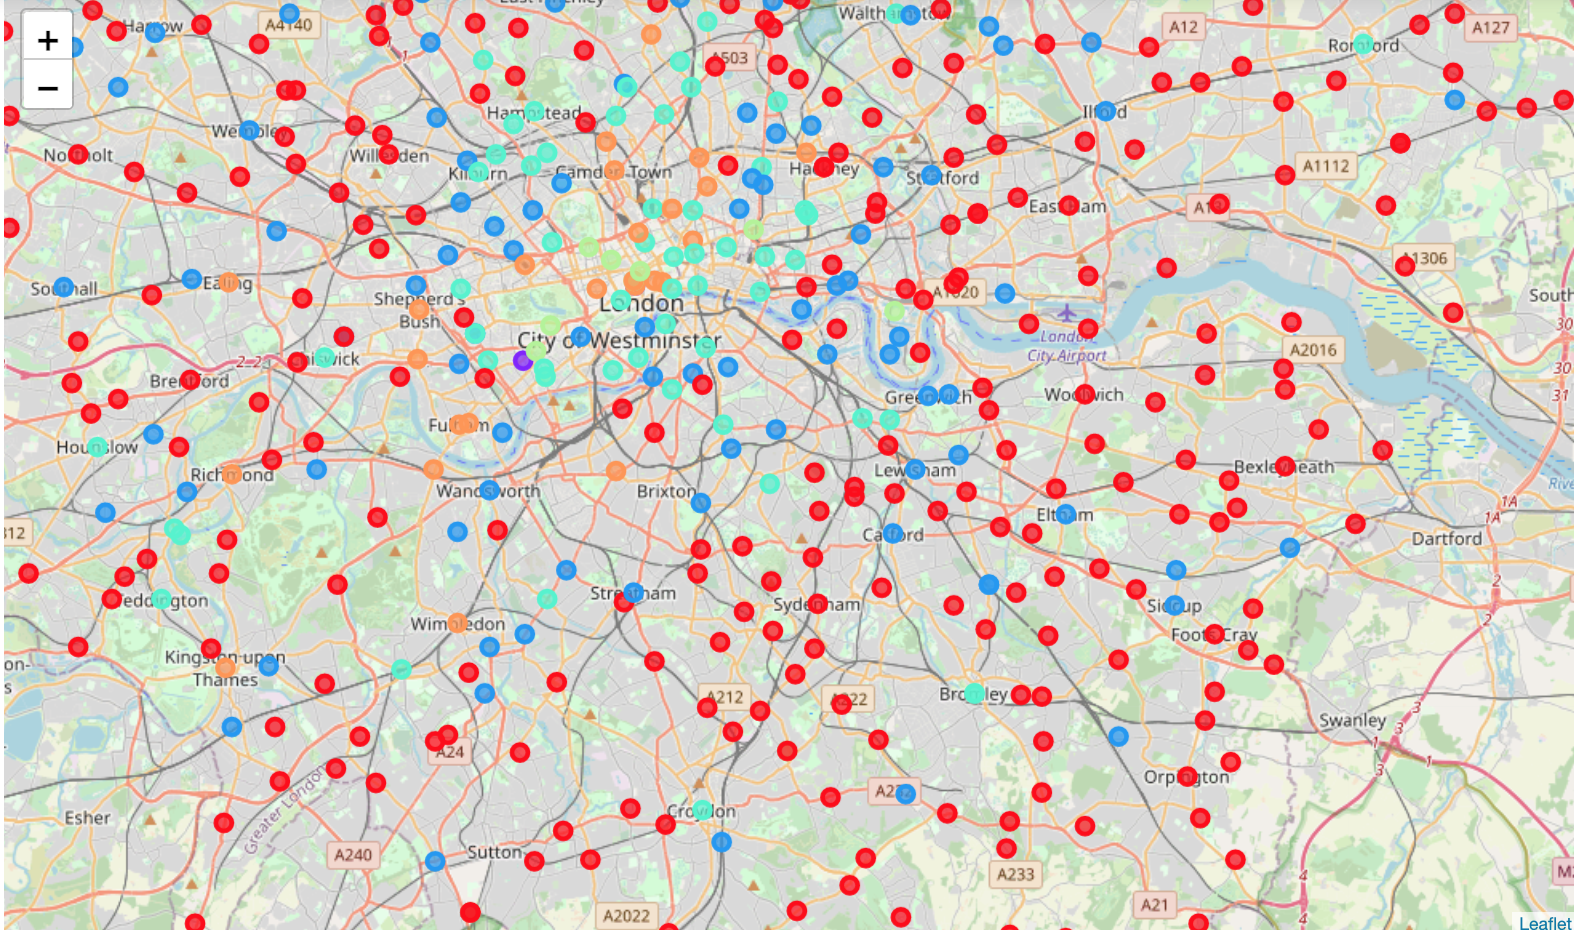

In [52]:
#Image of map included in case it does load
from IPython.display import Image
Image("London.png")

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
map_clusters = folium.Map(location=[40.730610,-73.935242], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfcombcluster['Latitude'], dfcombcluster['Longitude'], dfcombcluster['Neighborhood'], dfcombcluster['Cluster']):
    try:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)
    except:
        continue

map_clusters

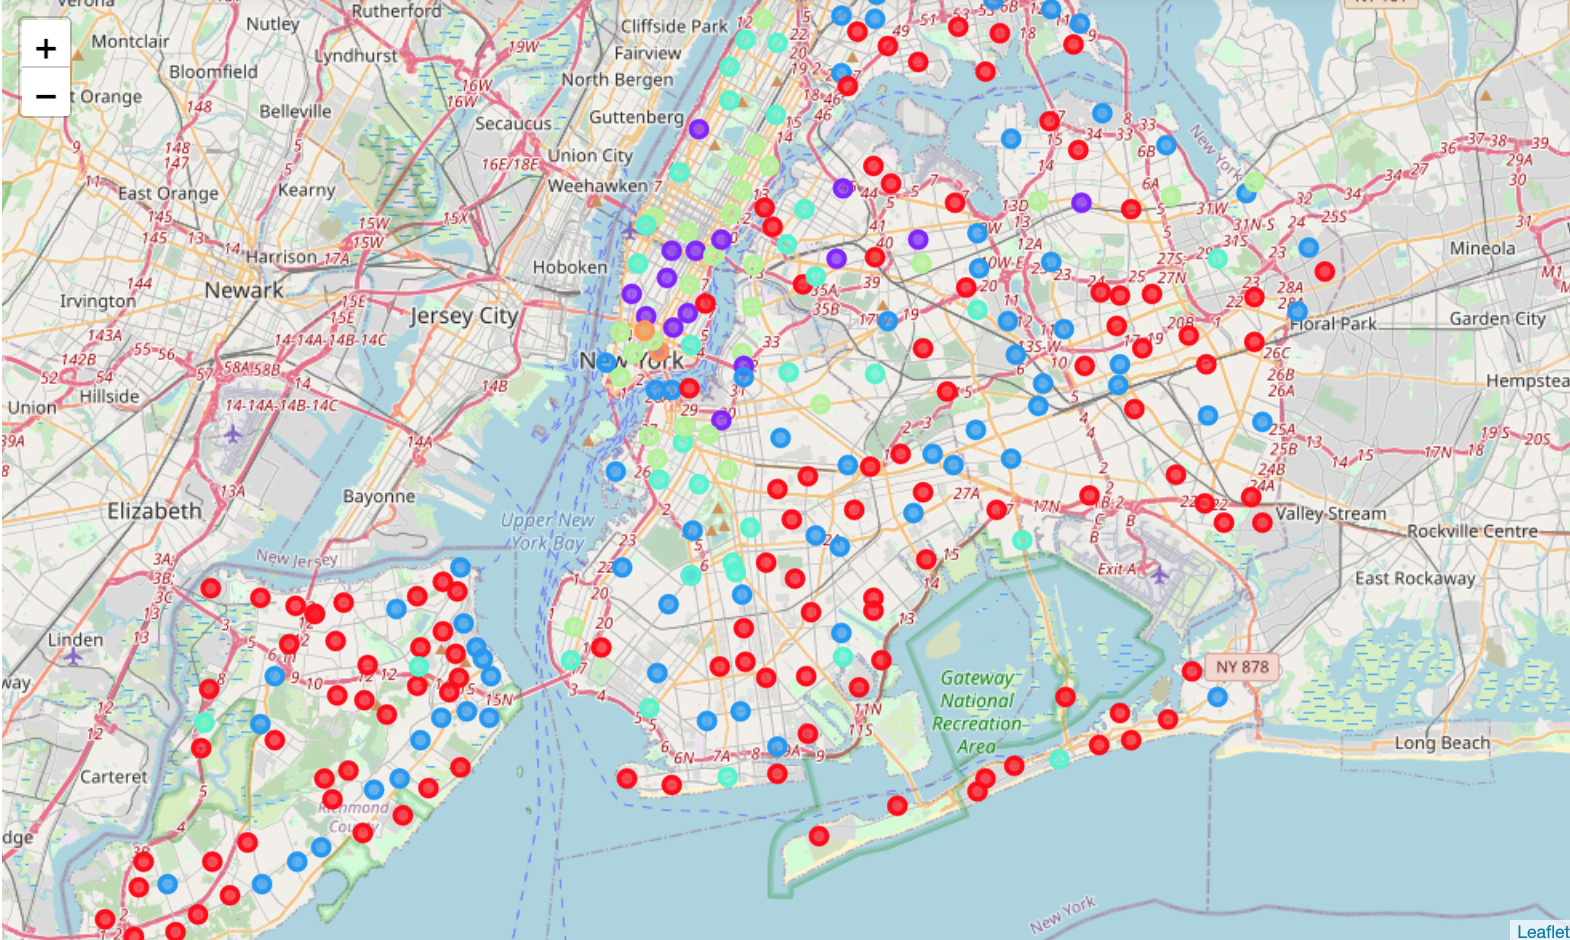

In [51]:
#Image included in case it does load
from IPython.display import Image
Image("NewYork.png")

## Define Cluster Centres




In [42]:
#Groupby Cluste rnad find mean values
centres=dfcombcluster.groupby('Cluster').mean()
centres

ATM  Accessories Store  Adult Boutique  Airport Terminal  \
Cluster                                                                  
0        0.002237           0.004474        0.000000          0.004474   
1        0.000000           0.166667        0.055556          0.000000   
2        0.000000           0.021622        0.000000          0.000000   
3        0.000000           0.021505        0.000000          0.000000   
4        0.000000           0.061224        0.081633          0.000000   
5        0.000000           0.074074        0.000000          0.000000   

         Antique Shop    Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
Cluster                                                                         
0            0.002237  0.004474     0.013423    0.002237             0.015660   
1            0.000000  0.000000     0.500000    0.000000             0.277778   
2            0.016216  0.005405     0.102703    0.005405             0.032432   
3            0.021505  0.010753     0.301075    0.043011             0.118280   
4            0.040816  0.000000     0.755102    0.122449             0.204082   
5            0.000000  0.000000     0.444444    0.222222             0.666667   

         Arts & Entertainment  ...   Stables  Street Food Gathering  \
Cluster                        ...                                    
0                    0.000000  ...  0.002237               0.002237   
1                    0.000000  ...  0.000000               0.000000   
2                    0.000000  ...  0.000000               0.027027   
3                    0.021505  ...  0.000000               0.086022   
4                    0.000000  ...  0.000000               0.020408   
5                    0.037037  ...  0.000000               0.185185   

         Student Center      Taxi  Track Stadium  Tram Station  Watch Shop  \
Cluster                                                                      
0              0.002237  0.002237       0.008949      0.015660    0.000000   
1              0.000000  0.000000       0.000000      0.000000    0.000000   
2              0.000000  0.000000       0.000000      0.000000    0.000000   
3              0.000000  0.000000       0.000000      0.010753    0.000000   
4              0.000000  0.000000       0.000000      0.000000    0.000000   
5              0.000000  0.000000       0.000000      0.037037    0.037037   

         Windmill       Zoo  Zoo Exhibit  
Cluster                                   
0        0.002237  0.002237     0.002237  
1        0.000000  0.000000     0.000000  
2        0.000000  0.000000     0.021622  
3        0.000000  0.000000     0.000000  
4        0.000000  0.000000     0.000000  
5        0.000000  0.000000     0.000000  

[6 rows x 405 columns]

In [43]:
#show the top ten most common venues and number for the cluster centre
c=0
for index, row in centres.iterrows():
    print('cluster',c)
    a=row.to_frame()
    print(a.sort_values(by=[c],ascending=False).iloc[0:10])
    print('\n')
    c=c+1


cluster 0
                      0
Restaurant     1.259508
Pub            0.545861
Grocery Store  0.527964
Park           0.409396
Coffee Shop    0.409396
Café           0.360179
Pizza Place    0.333333
Supermarket    0.277405
Bus Stop       0.225951
Deli / Bodega  0.187919


cluster 1
                        1
Restaurant      37.444444
Coffee Shop      3.277778
Bakery           3.000000
Bar              2.944444
Pizza Place      2.666667
Hotel            1.888889
Sandwich Place   1.777778
Cocktail Bar     1.777778
Dessert Shop     1.666667
Café             1.555556


cluster 2
                      2
Restaurant     5.962162
Coffee Shop    1.329730
Pizza Place    1.329730
Grocery Store  1.086486
Pub            1.032432
Café           0.951351
Pharmacy       0.697297
Park           0.654054
Deli / Bodega  0.627027
Bakery         0.610811


cluster 3
                              3
Restaurant            12.430108
Coffee Shop            3.096774
Pub                    2.397849
Café        

### Cluster Centre Explanations

The top ten most common types of venues are shown for each cluster centre and the numbers shown for each type of venue indicate that there are this number of restaurants for the mean for the mean of the cluster.

Number of restaurants seems to be the largest deciding factor between the different cluster centres

Red - Cluster 0 - lowest number of Restaurants

Purple - Cluster 1 - Highest number of Restaurants 

Blue - Cluster 2 – second lowest number of restaurants and other types of venues

Turquoise/Light blue - Cluster 3 – medium to low number of restaurants 

Light Green - Cluster 4 - Second highest number of restaurants and high concentration of cafes and bars

Orange - Cluster 5 - Medium number restaurants and a good number of cafes and coffee shops 





In [44]:
dfcombcluster2=dfcombcluster[['Neighbourhood','City','Cluster']]

In [45]:
cluster0=dfcombcluster2[dfcombcluster['Cluster']==0]
cluster0

Neighbourhood      City  Cluster
0           Allerton  New York        0
1           Annadale  New York        0
2      Arden Heights  New York        0
3          Arlington  New York        0
5            Arverne  New York        0
..               ...       ...      ...
814         Woolwich    London        0
815   Worcester Park    London        0
816  Wormwood Scrubs    London        0
817          Yeading    London        0
818         Yiewsley    London        0

[447 rows x 3 columns]

In [46]:
cluster1=dfcombcluster2[dfcombcluster['Cluster']==1]
cluster1

Neighbourhood      City  Cluster
6              Astoria  New York        1
64           Chinatown  New York        1
65           Chinatown  New York        1
75        Clinton Hill  New York        1
98        East Village  New York        1
117           Flatiron  New York        1
142  Greenwich Village  New York        1
160    Jackson Heights  New York        1
198      Midtown South  New York        1
209        Murray Hill  New York        1
210        Murray Hill  New York        1
217               Noho  New York        1
281         South Side  New York        1
292  Sunnyside Gardens  New York        1
302         Turtle Bay  New York        1
306    Upper West Side  New York        1
315       West Village  New York        1
375           Brompton    London        1

In [47]:
cluster2=dfcombcluster2[dfcombcluster['Cluster']==2]
cluster2

Neighbourhood      City  Cluster
4             Arrochar  New York        2
10   Battery Park City  New York        2
12         Bay Terrace  New York        2
13         Bay Terrace  New York        2
18        Bedford Park  New York        2
..                 ...       ...      ...
801          Whetstone    London        2
802         White City    London        2
804            Whitton    London        2
810           Woodford    London        2
812          Woodlands    London        2

[185 rows x 3 columns]

In [48]:
cluster3=dfcombcluster2[dfcombcluster['Cluster']==3]
cluster3

Neighbourhood      City  Cluster
9        Bath Beach  New York        3
37      Boerum Hill  New York        3
41   Brighton Beach  New York        3
56   Central Harlem  New York        3
61          Chelsea    London        3
..              ...       ...      ...
775     Walthamstow    London        3
791    West Hackney    London        3
793  West Hampstead    London        3
803     Whitechapel    London        3
809      Wood Green    London        3

[93 rows x 3 columns]

In [53]:
cluster4=dfcombcluster2[dfcombcluster['Cluster']==4]
cluster4

Neighbourhood      City  Cluster
11            Bay Ridge  New York        4
15              Bayside  New York        4
27              Belmont  New York        4
28              Belmont  New York        4
29              Belmont  New York        4
48             Bushwick  New York        4
52        Carnegie Hill  New York        4
53      Carroll Gardens  New York        4
58              Chelsea  New York        4
59              Chelsea  New York        4
60              Chelsea  New York        4
70         Civic Center  New York        4
74              Clinton  New York        4
77          Cobble Hill  New York        4
90             Downtown  New York        4
109            Elmhurst  New York        4
115  Financial District  New York        4
120            Flushing  New York        4
124         Fort Greene  New York        4
134            Gramercy  New York        4
140          Greenpoint  New York        4
144    Hamilton Heights  New York        4
157       Hunters Point  New York        4
159              Inwood  New York        4
174          Lenox Hill  New York        4
178        Little Italy  New York        4
179         Little Neck  New York        4
197             Midtown  New York        4
220          North Side  New York        4
241    Prospect Heights  New York        4
272                Soho  New York        4
273                Soho  New York        4
294        Sutton Place  New York        4
300             Tribeca  New York        4
301          Tudor City  New York        4
305     Upper East Side  New York        4
311  Washington Heights  New York        4
327            Woodside  New York        4
328            Woodside  New York        4
331           Yorkville  New York        4
384        Canary Wharf    London        4
401          Church End    London        4
402          Church End    London        4
469           Fitzrovia    London        4
565       Knightsbridge    London        4
594          Marylebone    London        4
692          Shoreditch    London        4
702    South Kensington    London        4
714            St Giles    London        4

In [50]:
cluster5=dfcombcluster2[dfcombcluster['Cluster']==5]
cluster5

Neighbourhood    City  Cluster
66              Chinatown  London        5
67              Chinatown  London        5
274                  Soho  London        5
275                  Soho  London        5
335               Aldwych  London        5
383           Camden Town  London        5
403               Clapham  London        5
404           Clerkenwell  London        5
413         Covent Garden  London        5
424            Crouch End  London        5
440                Ealing  London        5
478                Fulham  London        5
496       Hackney Central  London        5
503           Hammersmith  London        5
532              Highbury  London        5
551             Islington  London        5
555          Kentish Town  London        5
564  Kingston upon Thames  London        5
595               Mayfair  London        5
645            Paddington  London        5
648         Parsons Green  London        5
651           Pentonville  London        5
665                Putney  London        5
673              Richmond  London        5
689       Shepherd's Bush  London        5
722            St Pancras  London        5
807             Wimbledon  London        5